# RNN con California Housing

## Librerías

In [1]:
# Tratamiento de datos
import pandas as pd
import numpy as np

# Visualizaciones
import matplotlib.pyplot as plt
import seaborn as sns

#Modelo de aprendizaje
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, root_mean_squared_error,mean_absolute_percentage_error
from sklearn.datasets import fetch_california_housing

# Redes neuronales
import tensorflow as tf
from tensorflow import keras
from keras import layers

2025-03-05 19:50:27.571200: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


## Descarga y carga de datos

In [2]:
housing = fetch_california_housing()

X = housing.data
y= housing.target

features_names = housing.feature_names

## Crear un DataFrame

In [3]:
df = pd.DataFrame(X, columns=features_names)

df['Price'] = y

In [4]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

## Primera Exploración

In [5]:
print(f'Tamaño del dataset {df.shape}')
print('\nInformación de las columnas:')
print(df.info())
print('\nEstadísticas descriptivas')
print(df.describe())
print()


Tamaño del dataset (20640, 9)

Información de las columnas:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Price       20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB
None

Estadísticas descriptivas
             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
count  20640.000000  20640.000000  20640.000000  20640.000000  20640.000000   
mean       3.870671     28.639486      5.429000      1.096675   1425.476744   
std        1.899822     12.585558      2.474173      0.473911   1132.462

In [6]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


Ya vemos que hay algo raro en los número, ya que son flotantes el números de habitaciones, el número de dormitorios, etc..
Pero para nuestro caso y lo que queremos, no es importante, ni nos ocupa. Simplemente queremos llegar a las redes neuronales.

Dado que queremos averiguar el precio, que es una variable numérica continua, es un problema de regresión, y lo importante es comprobar que la target tiene una distribución normal.

Text(0, 0.5, 'Frecuencia')

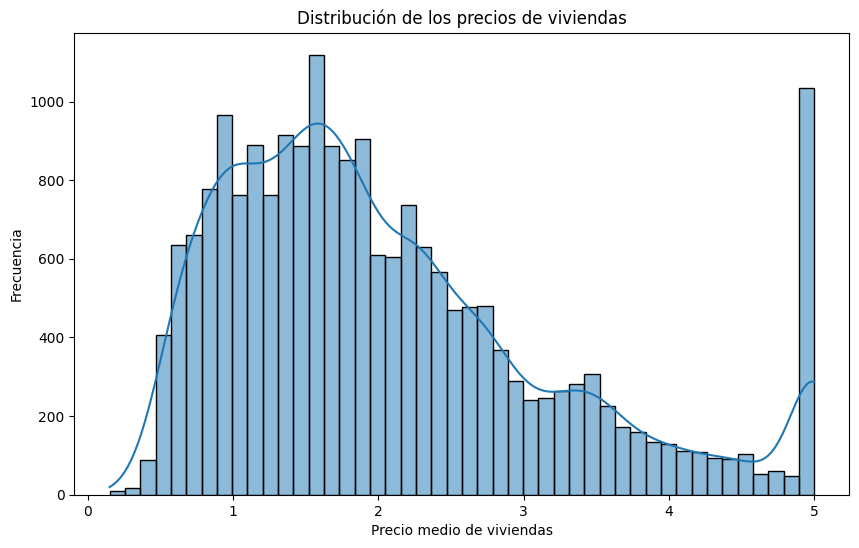

In [7]:
#Visualización de la distribución de precios
plt.figure (figsize=(10,6))
sns.histplot (df['Price'], kde = True)
plt. title ('Distribución de los precios de viviendas')
plt.xlabel('Precio medio de viviendas')
plt.ylabel('Frecuencia')

Text(0.5, 1.0, 'Matriz de correlación')

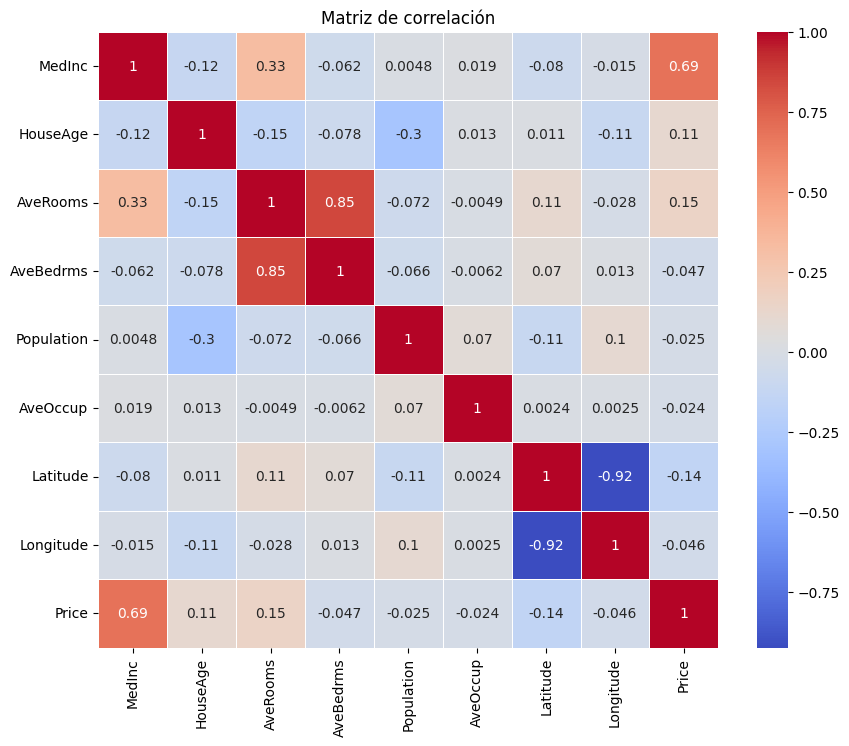

In [8]:
# Matriz de correlación
plt.figure (figsize= (10,8))
correlacion_matrix= df.corr()  # lo define aquí para que si necesita quitar alguna columna=feature,
                        #aquí es más sencillo con un drop
sns.heatmap(correlacion_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt. title ('Matriz de correlación')

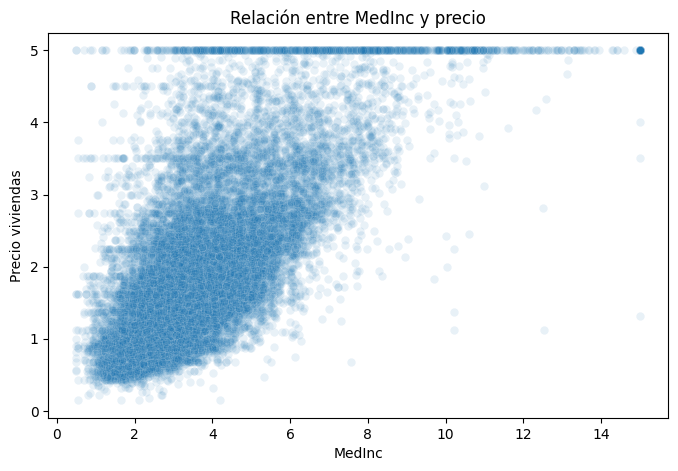

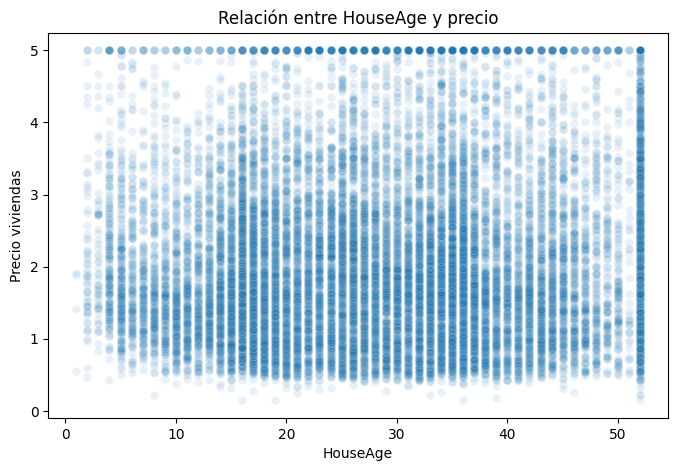

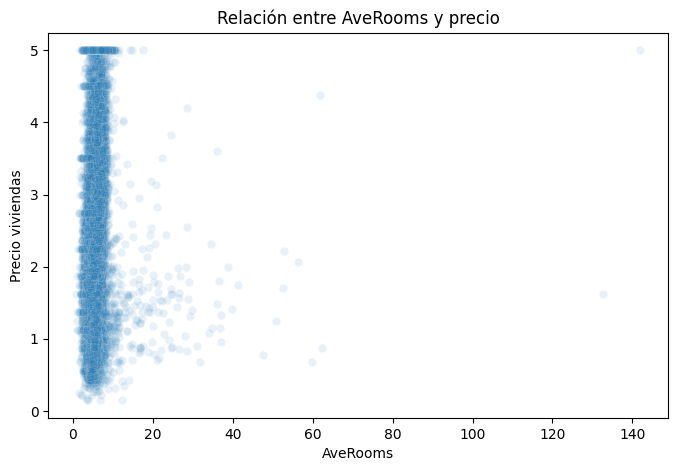

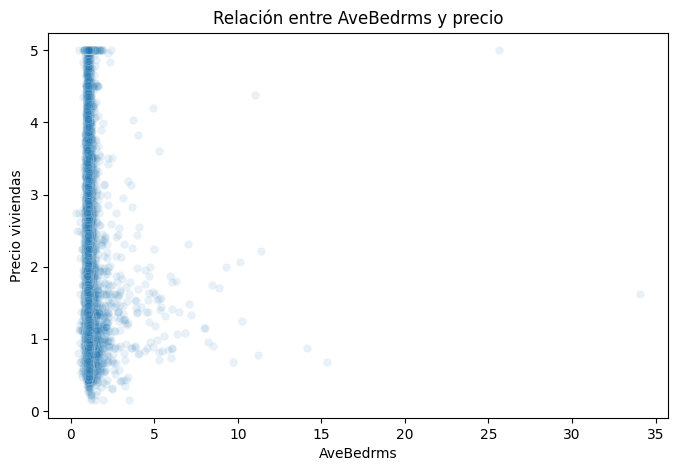

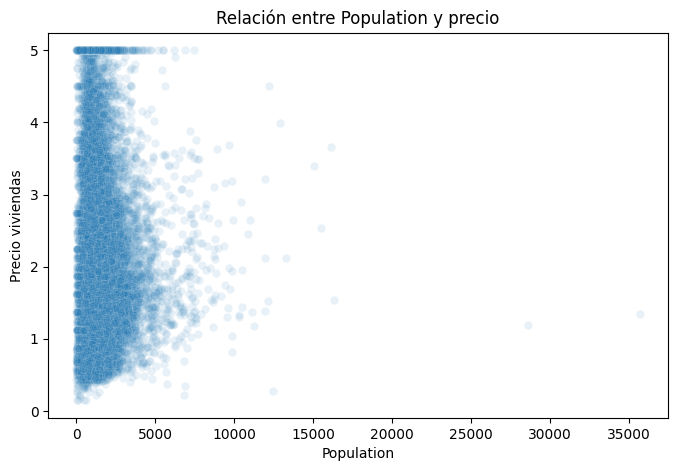

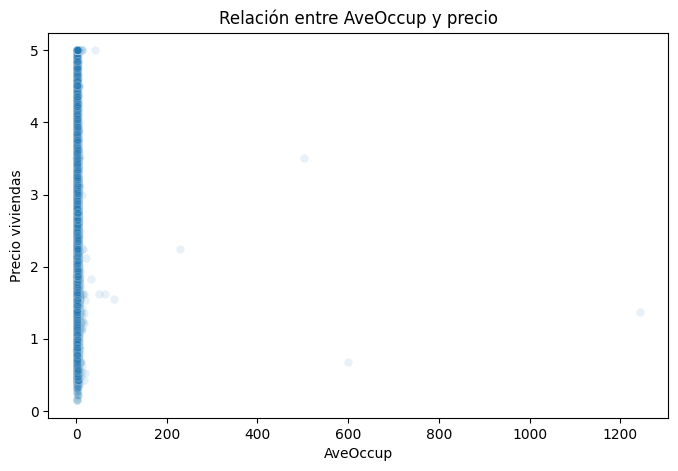

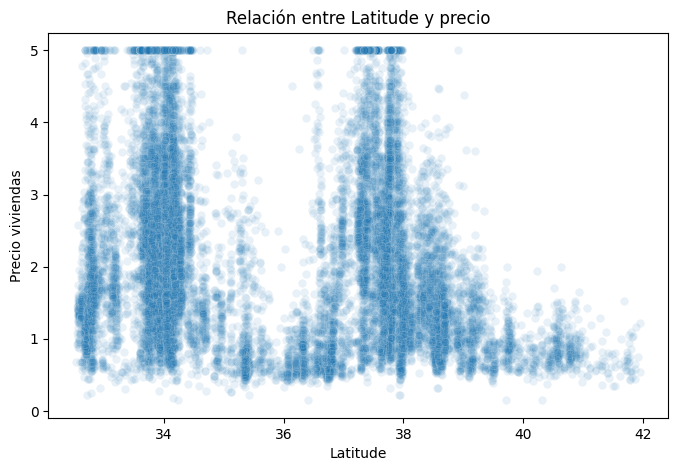

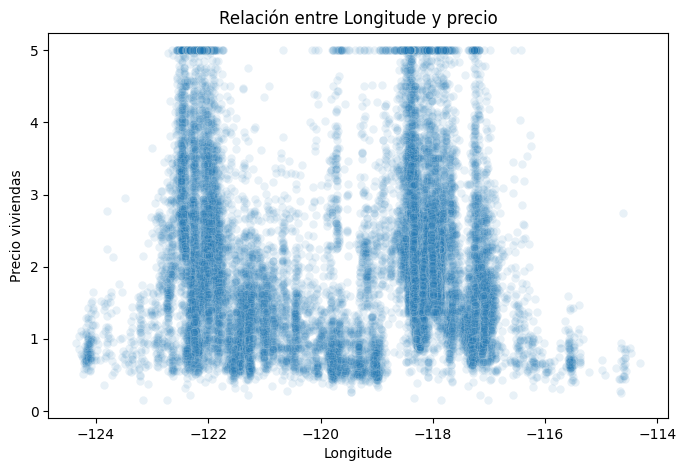

In [9]:
# Visualizaciones de relaciones entre características (features) y target (price)

for feature in features_names:
    plt.figure(figsize=(8,5))
    sns.scatterplot(x=df[feature], y = df['Price'], alpha = 0.1)
    plt.title(f'Relación entre {feature} y precio')
    plt.xlabel(feature)
    plt.ylabel('Precio viviendas')
    plt.show()

<Axes: xlabel='Latitude', ylabel='Longitude'>

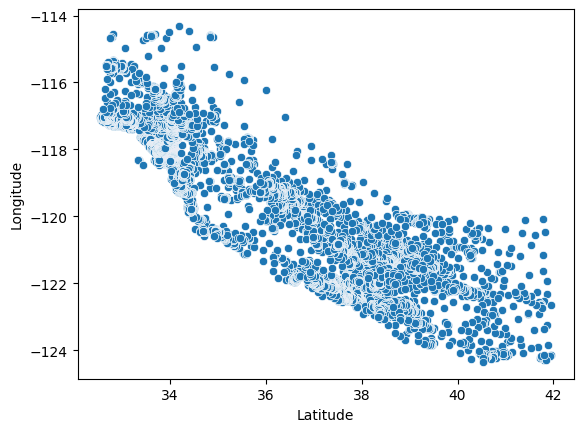

In [10]:
sns.scatterplot(x=df ['Latitude'], y= df['Longitude'])
# es exactemante igual que esto
# sns.scatterplot(x=df ['Latitude']/5, y= df['Longitude']/5)

## Preprocesado de datos

Debo escalar los datos, ya que si hubiera visto bien los datos, están en average, para que todo esté en el mismo rango de datos. 

No puedo escalar todos los datos incluyendo la target. Así pues separo primero la target.
Además, he de escalar la target, sin hacerlo en el grupo test.

In [11]:
# Dividir en train y test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=73)

# Escalado de los datos


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


## Construir el Modelo
(porque la Red neuronal no deja de ser un modelo más)


In [12]:
def build_model (input_shape, learning_rate=0.001):
    model = keras.Sequential(
        [           #JM no quiere poner aquí la capa input porque se pone muy exigente con los parámetros, así
                    #lo pone en la linea de capa Densa, detrás
            layers.Dense(128, activation = 'relu', input_shape=(input_shape,)),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(64, activation='relu'),
            layers.BatchNormalization(),
            layers.Dropout(0.3),
            layers.Dense(32, activation= 'relu'), 
            layers.BatchNormalization(),
            layers.Dropout(0.2),
            layers.Dense(16, activation = 'relu'),           
            layers.Dense(1)
        ]
        
    )
    optimizador = keras.optimizers.Adam(learning_rate=learning_rate)
    
    model.compile(
        optimizer = optimizador,   
        loss="mse",
        metrics=["mae"]
    ) 
    return model


In [13]:
model = build_model(X_train_scaled.shape[1])
model.summary()

/Users/angelg.villanueva/Documents/04_DATA/041_DATASCIENCE_BOOTCAMP/DS102024_2/.venv/lib/python3.11/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 128)            │         1,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32)             │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 32)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 12,929 (50.50 KB)

 Trainable params: 12,481 (48.75 KB)

 Non-trainable params: 448 (1.75 KB)

___________________________________________________________
DESCANSO

Ahora me falta definir 'Early stopping', la tasa de aprendizaje, 'reduced learning rate' del modelo, y entrenar el modelo 

In [14]:
# Callback de entrenamiento 

early_stopping =keras.callbacks.EarlyStopping(
    patience = 30, 
    min_delta = 0.001,
    restore_best_weights = True, 
    monitor = 'val_loss'
)

reduce_lr = keras.callbacks.ReduceLROnPlateau(
    factor = 0.2,
    patience = 10, 
    min_lr = 0.00001,
    monitor = 'val_loss'
)


In [15]:
# Entrenar el Modelo

history = model.fit(
    X_train_scaled, 
    y_train,
    validation_split = 0.2,
    epochs = 300,
    batch_size = 32,  #regla del dataset, algo como número de filas por número de columnas con blablabla...
    callbacks = [early_stopping, reduce_lr]
)

Epoch 1/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 17s 13ms/step - loss: 1.8390 - mae: 1.0198 - val_loss: 0.6222 - val_mae: 0.5590 - learning_rate: 0.0010
Epoch 2/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - loss: 0.7552 - mae: 0.6458 - val_loss: 0.4772 - val_mae: 0.4884 - learning_rate: 0.0010
Epoch 3/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 10s 12ms/step - loss: 0.6243 - mae: 0.5821 - val_loss: 0.4992 - val_mae: 0.4550 - learning_rate: 0.0010
Epoch 4/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.5560 - mae: 0.5450 - val_loss: 0.5144 - val_mae: 0.4755 - learning_rate: 0.0010
Epoch 5/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 9ms/step - loss: 0.5074 - mae: 0.5190 - val_loss: 0.3878 - val_mae: 0.4311 - learning_rate: 0.0010
Epoch 6/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - loss: 0.4856 - mae: 0.5085 - val_loss: 0.4056 - val_mae: 0.4447 - learning_rate: 0.0010
Epoch 7/300
413/413 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - loss: 0.4621 - mae: 0.4915 - val_loss: 0.4078 - val_mae: 0.4311 - learning_rate: 

Ahora resta evaluar el modelo.

In [16]:
test_mse, test_mae = model.evaluate (X_test_scaled, y_test, verbose = 0)

In [17]:
test_mse, test_mae = model.evaluate (X_test_scaled, y_test, verbose = 0)

y_pred = model.predict (X_test_scaled)

mse = mean_squared_error (y_test, y_pred)
rmse = root_mean_squared_error (y_test, y_pred)
mape = mean_absolute_percentage_error (y_test, y_pred)
mae = mean_absolute_error (y_test, y_pred)
R2 = r2_score(y_test, y_pred)

print(f'Test Mean Squared Error (MSE): {mse: .4f}'), 
print(f'Test Root Mean Squared Error (RMSE): {rmse*100_000: .4f}'), 
print(f'Test Mean Absolute Percentage Error (MAPE): {mape: .4f}')
print(f'Test Mean Absolute Error (MAE): {mae: .4f}')
print(f'Test R-squared: {R2: .4f}')

129/129 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step
Test Mean Squared Error (MSE):  0.2961
Test Root Mean Squared Error (RMSE):  54417.1710
Test Mean Absolute Percentage Error (MAPE):  0.2055
Test Mean Absolute Error (MAE):  0.3679
Test R-squared:  0.7816


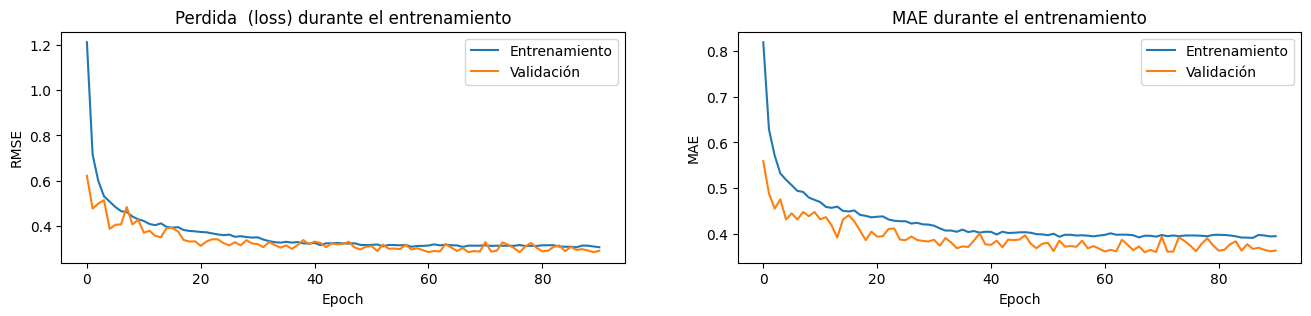

In [18]:
plt.figure(figsize = (16,3))

plt.subplot (1,2,1)
plt.plot (history.history['loss'], label='Entrenamiento')
plt.plot (history.history['val_loss'], label='Validación')
plt.title ('Perdida  (loss) durante el entrenamiento')
plt.xlabel ('Epoch')
plt.ylabel ('RMSE')
plt.legend()

#plt.figure(figsize = (12,5))

plt.subplot (1,2,2)
plt.plot (history.history['mae'], label='Entrenamiento')
plt.plot (history.history['val_mae'], label='Validación')
plt.title ('MAE durante el entrenamiento')
plt.xlabel ('Epoch')
plt.ylabel ('MAE')
plt.legend()
plt.show()

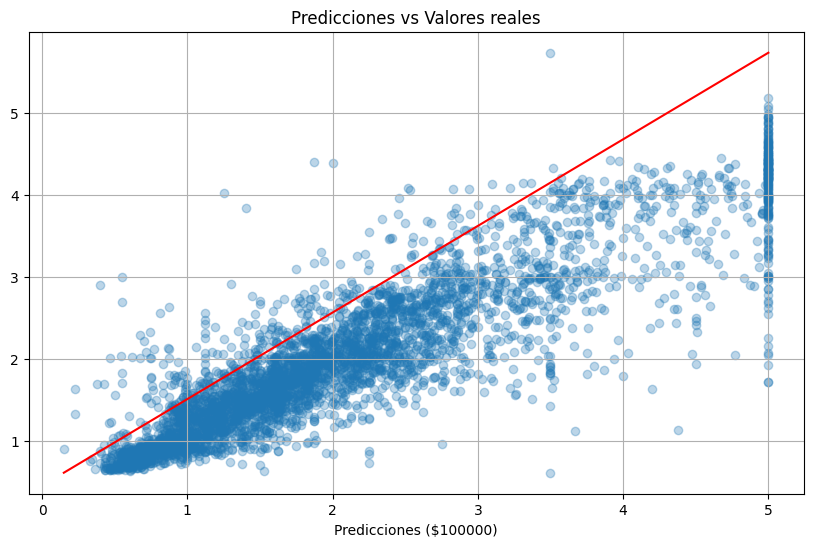

In [19]:
plt.figure (figsize= (10,6))
plt.scatter(y_test, y_pred, alpha = 0.3)
plt.plot ((y_test.min(), y_test.max()), (y_pred.min(), y_pred.max()), color= 'r')
plt.xlabel ('Precios reales ($100000)')
plt.xlabel ('Predicciones ($100000)')
plt.title ('Predicciones vs Valores reales')
plt.grid (True)
plt.show()

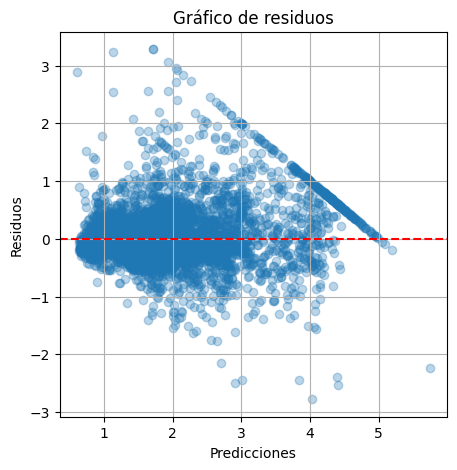

In [20]:
residuos = y_test - y_pred.flatten()

plt.figure(figsize = (5,5))

plt.scatter (y_pred, residuos, alpha = 0.3)
plt. axhline (y=0, color = 'r', linestyle = '--')

plt.xlabel ('Predicciones')
plt.ylabel ('Residuos')
plt.title ('Gráfico de residuos')
plt.grid (True)
plt.show()

In [ ]:
plt.figure (figsize= (10,4))
sns.histplot(residuos, kde = True)
plt.title ('Distribución de residuos')
plt.xlabel ('Error')
plt.ylabel ('Frecuencia')
plt.grid(True)
plt.show()

Quiero hacer una reducción de características, Feature Importance: Lo mas fácil para hacer un Feature importance, antes de PCA o no supervisado.

In [ ]:
from sklearn.ensemble import RandomForestRegressor

rf_model =RandomForestRegressor(n_estimators=100, random_state=73)
rf_model.fit(X_train_scaled, y_train)

importances = rf_model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10,6))
plt.barh(range(len(indices)), importances[indice], align= 'center')
plt.yticks(range(len(indices)), [features_names[i] for i in indices])

plt.xlabel ('Importancia relativa')
plt.title('Importancia de características')
plt.tight_layout
plt.show();


Ahora puedo comprobar qué columnas son las más importantes. Si decido, por ejemplo, que podría eliminar las dos de menor importancia, lo que hago es duplicar el notebook, probar y decidir. Si fuera que no mejoro, sigo con este notebook sin FeImportance. 
Y si mejora, continuo en el notebook duplicado, y pongo el FI arriba, al principio, justificado porque ya he comprobado que funciona.

En este caso y ejemplo, no va a eliminar nada, ni probó si el modelo mejoraría o no, así que sigue. 
Va a hacer una optimización del modelo, tipo Random Search (podría ser Grid Search, aunque tarda muuuuuucho), no lo hace con SkLearn, sino con Keras. 